# Loading required packages

In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import shutil
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers.legacy import Adam,SGD,Adadelta
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from keras.optimizers import Adam, SGD, Adadelta

from tensorflow.keras.layers import Conv2D, Dropout, Dense
from tensorflow.keras.models import Sequential

In [3]:
import random
import keras_tuner
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.losses import CategoricalCrossentropy


In [34]:
dataset1_path="./Vegetables"


In [35]:
for category_folder in os.listdir(dataset1_path):
    if(category_folder!='.DS_Store'):
        print(category_folder)
        

RottenCucumber
FreshTomato
RottenBellpepper
FreshCarrot
FreshBellpepper
RottenCarrot
RottenTomato
RottenCapsicum
FreshPotato
FreshCapsicum
FreshCucumber
RottenPotato


In [6]:
#Kepping only png or jpg image format 
for foldername in os.listdir(dataset1_path):
    folder_path = os.path.join(dataset1_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_extension = os.path.splitext(filename)[1]
            if file_extension != '.jpg' and file_extension != '.png':
                file_path = os.path.join(folder_path, filename)
                os.remove(file_path)



In [7]:
# Function to remove .DS_Store file from a directory
def remove_ds_store(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == ".DS_Store":
                os.remove(os.path.join(root, file))

# Remove .DS_Store files from the dataset1_path directory
remove_ds_store(dataset1_path)



In [36]:
# Split the data into training, validation, and test sets for vegetables
splitfolders.ratio(dataset1_path, output="outputfinal", seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 13749 files [00:05, 2548.32 files/s]


In [37]:
dataset2_path="./Fruits"

In [38]:
for category_folder in os.listdir(dataset2_path):
    if(category_folder!='.DS_Store'):
        print(category_folder)


FreshBanana
RottenLime
FreshOrange
RottenOrange
FreshGuava
FreshApple
RottenBanana
RottenGuava
FreshLime
RottenApple


In [8]:
for foldername in os.listdir(dataset2_path):
    folder_path = os.path.join(dataset2_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_extension = os.path.splitext(filename)[1]
            if file_extension != '.jpg' and file_extension != '.png':
                file_path = os.path.join(folder_path, filename)
                os.remove(file_path)

In [9]:
# Function to remove .DS_Store file from a directory
def remove_ds_store(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == ".DS_Store":
                os.remove(os.path.join(root, file))

# Remove .DS_Store files from the dataset1_path directory
remove_ds_store(dataset2_path)

In [39]:
# Split the data into training, validation, and test sets for fruits
splitfolders.ratio(dataset2_path, output="outputfinal", seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 25332 files [00:11, 2202.92 files/s]


In [40]:
#Declaring image size and channels 
IMAGE_SIZE=224
CHANNELS=3


In [41]:
train_datagen =ImageDataGenerator(rescale=1./255)
train_generator= train_datagen.flow_from_directory(
    './outputfinal/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="categorical")

Found 31256 images belonging to 22 classes.


In [12]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [42]:
validation_datagen =ImageDataGenerator(rescale=1./255)
validation_generator= validation_datagen.flow_from_directory(
    './outputfinal/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="categorical")
test_datagen =ImageDataGenerator(rescale=1./255)
test_generator= test_datagen.flow_from_directory(
    './outputfinal/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="categorical")

Found 3897 images belonging to 22 classes.
Found 3928 images belonging to 22 classes.


In [43]:
class_names_arr = train_generator.classes

In [44]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 22
print(input_shape)

(224, 224, 3)


In [16]:
import keras
from keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

import keras
import IPython

In [17]:
import keras_tuner
import keras
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input

In [45]:
import keras.backend as K
def f1_score_metric(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [46]:

def build_model(hp):
    model = Sequential()
    
    model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Flatten())
    model.add(Dense(1264, activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Dense(n_classes, activation='softmax'))
    model.add(Dropout(rate=hp.Float('conv_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    optimizer_choice = hp.Choice('optimizer', values=['adam', 'adadelta', 'sgd'])
    learning_rate = hp.Float('learning_rate', min_value=1e-3, max_value=1e-1, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'adadelta':
        optimizer = Adadelta(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    
    # Assuming f1_score_metric is defined elsewhere
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy', f1_score_metric])
    return model


In [47]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [48]:
class_labels = np.unique(train_generator.classes)

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = class_labels,
                                        y = train_generator.classes                                                 
                                    )
class_weight_dict = dict(zip(class_labels, class_weights))

# Print computed class weights
print("Computed Class Weights:", class_weight_dict)

Computed Class Weights: {0: 0.4582991202346041, 1: 0.5549715909090909, 2: 2.9293345829428303, 3: 1.7938475665748392, 4: 2.9293345829428303, 5: 1.6274081016349058, 6: 4.95026924295217, 7: 1.6236883116883116, 8: 0.6126465169155985, 9: 1.5510123064708217, 10: 0.7222812774414198, 11: 0.36541339319117094, 12: 0.42233272078694195, 13: 3.010015408320493, 14: 1.9732323232323232, 15: 3.0751672569854387, 16: 1.8052443109622271, 17: 1.5733413872948756, 18: 3.661668228678538, 19: 0.5508830060982058, 20: 1.282244830981293, 21: 0.7376569432644199}


In [49]:
# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='logs',
    project_name='tuning'
)

Reloading Tuner from logs/tuning/tuner0.json


In [58]:
print(len(train_generator))

977


In [59]:
print(len(validation_generator))

122


In [50]:
tuner.search(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    class_weight = class_weight_dict
)

Trial 5 Complete [03h 02m 11s]
val_accuracy: 0.09930715709924698

Best val_accuracy So Far: 0.8845265507698059
Total elapsed time: 12h 11m 12s


In [51]:
# Get the optimal hyperparameters
best_hps= tuner.get_best_hyperparameters(1)[0]

# get the best model
model = tuner.get_best_models(1)[0]

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 110, 110, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 54, 54, 64)        0

In [53]:
best_optimizer = best_hps.get('optimizer')

In [54]:
learning_rate = best_hps.get('learning_rate') 

In [55]:
if best_optimizer == 'Adam':
    best_optimizer_name = Adam(learning_rate=learning_rate)
elif best_optimizer == 'sgd':
    best_optimizer_name = SGD(learning_rate=learning_rate)
elif best_optimizer == 'Adadelta':
    best_optimizer_name = Adadelta(learning_rate=learning_rate)
else:
    raise ValueError("Unknown optimizer name:", best_optimizer)

In [65]:
model.compile(
    optimizer=best_optimizer_name,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy',f1_score_metric]
)


In [58]:
dropout_rate = best_hps.get('conv_dropout_rate')

In [59]:
model.add(tf.keras.layers.Dropout(dropout_rate))

# Training model

In [66]:
callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00001,
    patience=3,
    verbose=1,
    mode="max",
    baseline=None,
    restore_best_weights=False
)

In [67]:
filepath="ok.h5"

In [68]:
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')



In [69]:

history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=122,
    verbose=1,
    epochs=60,
    class_weight = class_weight_dict,
    callbacks=[callback, checkpoint]
)

Epoch 1/60
977/977 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2442 - f1_score_metric: 0.3687
Epoch 1: val_accuracy improved from -inf to 0.87580, saving model to ok.h5


/Applications/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


977/977 [==============================] - 3267s 3s/step - loss: nan - accuracy: 0.2442 - f1_score_metric: 0.3687 - val_loss: 0.4046 - val_accuracy: 0.8758 - val_f1_score_metric: 0.8774
Epoch 2/60
977/977 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2486 - f1_score_metric: 0.3743
Epoch 2: val_accuracy improved from 0.87580 to 0.87811, saving model to ok.h5
977/977 [==============================] - 3017s 3s/step - loss: nan - accuracy: 0.2486 - f1_score_metric: 0.3743 - val_loss: 0.3927 - val_accuracy: 0.8781 - val_f1_score_metric: 0.8784
Epoch 3/60
977/977 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2462 - f1_score_metric: 0.3731
Epoch 3: val_accuracy improved from 0.87811 to 0.90121, saving model to ok.h5
977/977 [==============================] - 2236s 2s/step - loss: nan - accuracy: 0.2462 - f1_score_metric: 0.3731 - val_loss: 0.3424 - val_accuracy: 0.9012 - val_f1_score_metric: 0.8999
Epoch 4/60
977/977 [============================

# Plotting train and valadation loss

In [70]:
import matplotlib.pyplot as plt

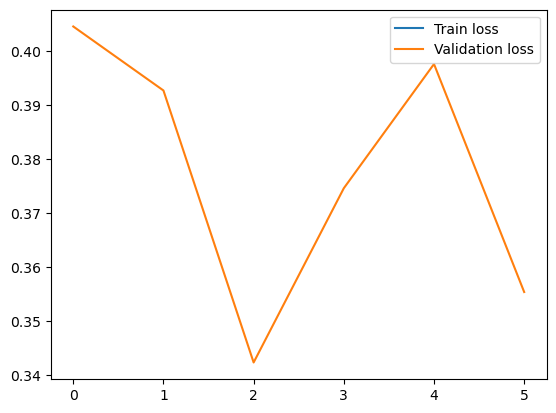

In [71]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

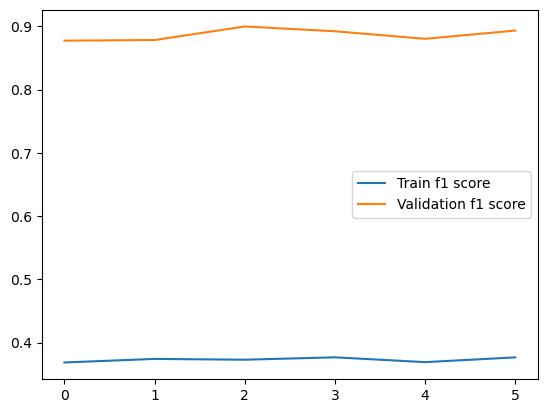

In [73]:
plt.plot(history.history['f1_score_metric'], label='Train f1 score')
plt.plot(history.history['val_f1_score_metric'], label='Validation f1 score')
plt.legend()
plt.show()

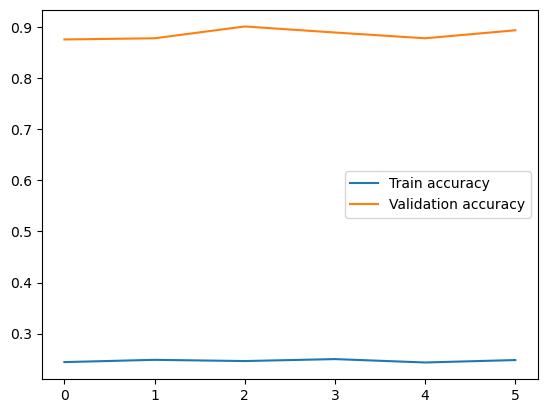

In [72]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = test_generator.classes

123/123 [==============================] - 61s 494ms/step


In [77]:
class_name=list(train_generator.class_indices.keys())
class_name

['FreshApple',
 'FreshBanana',
 'FreshBellpepper',
 'FreshCapsicum',
 'FreshCarrot',
 'FreshCucumber',
 'FreshGuava',
 'FreshLime',
 'FreshOrange',
 'FreshPotato',
 'FreshTomato',
 'RottenApple',
 'RottenBanana',
 'RottenBellpepper',
 'RottenCapsicum',
 'RottenCarrot',
 'RottenCucumber',
 'RottenGuava',
 'RottenLime',
 'RottenOrange',
 'RottenPotato',
 'RottenTomato']

122/122 [==============================] - 63s 514ms/step
Confusion Matrix:
[[36 32  6 10  6 13  3 11 38 11 15 44 44  6  8  7 12 13  6 31 13 22]
 [34 20  5  9  5 10  0  5 24 11 28 37 32  4  9  5  5 14  9 25 12 17]
 [11  2  2  0  0  2  1  2  4  2  1  9  9  1  1  2  1  0  1  1  2  6]
 [13 11  2  2  1  4  1  2  3  2  6 15  9  1  0  3  1  1  1  9  5  7]
 [ 7  4  0  0  1  3  0  2  3  0  3 10  4  0  4  2  1  3  1  4  4  4]
 [15 15  2  2  2  4  2  1  6  0  8  9 12  2  4  2  0  1  0 11  5  6]
 [ 4  1  2  1  1  1  0  0  2  0  3  3  2  0  0  3  0  3  0  3  4  2]
 [15 10  2  2  1  2  2  4  7  2  5 12 15  1  4  2  1  3  2  7  7  3]
 [38 23  6  8  2 10  5 10 20  7 20 20 32  4  8  4  5  6  7 20  9 25]
 [12  7  0  3  3  5  4  3  7  0  5 20  8  1  4  4  5  4  1  4  5  9]
 [29 22  4  7  1  4  5 10 17  6 14 34 21  1  4  3  4  9  6 18 15 11]
 [57 39 15 13  9 12 10 15 33 17 29 45 47  5 10 11  8 11  3 37 25 35]
 [38 29  6  8  9 15  2 11 36  8 26 46 43 10 10  5  8 11  4 40 20 35]
 [ 3  6  1  1  0  2  0  3  

<Axes: >

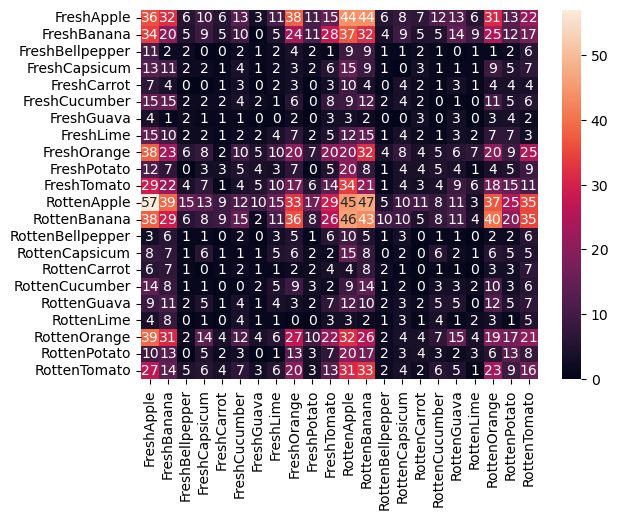

In [78]:
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_true, y_pred_labels, target_names=class_name)  # Assuming class_names_list is defined
print("Classification Report:")
print(cr)
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_name, yticklabels=class_name)

In [79]:
scores = model.evaluate(test_generator)
scores

123/123 [==============================] - 67s 540ms/step - loss: 0.3708 - accuracy: 0.8842 - f1_score_metric: 0.8855


[0.37084102630615234, 0.8841649889945984, 0.8855143189430237]

In [80]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'f1_score_metric', 'val_loss', 'val_accuracy', 'val_f1_score_metric'])

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']



In [82]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [83]:
class_names = list(train_generator.class_indices.keys())
class_names

['FreshApple',
 'FreshBanana',
 'FreshBellpepper',
 'FreshCapsicum',
 'FreshCarrot',
 'FreshCucumber',
 'FreshGuava',
 'FreshLime',
 'FreshOrange',
 'FreshPotato',
 'FreshTomato',
 'RottenApple',
 'RottenBanana',
 'RottenBellpepper',
 'RottenCapsicum',
 'RottenCarrot',
 'RottenCucumber',
 'RottenGuava',
 'RottenLime',
 'RottenOrange',
 'RottenPotato',
 'RottenTomato']

1/1 [==============================] - 0s 72ms/step


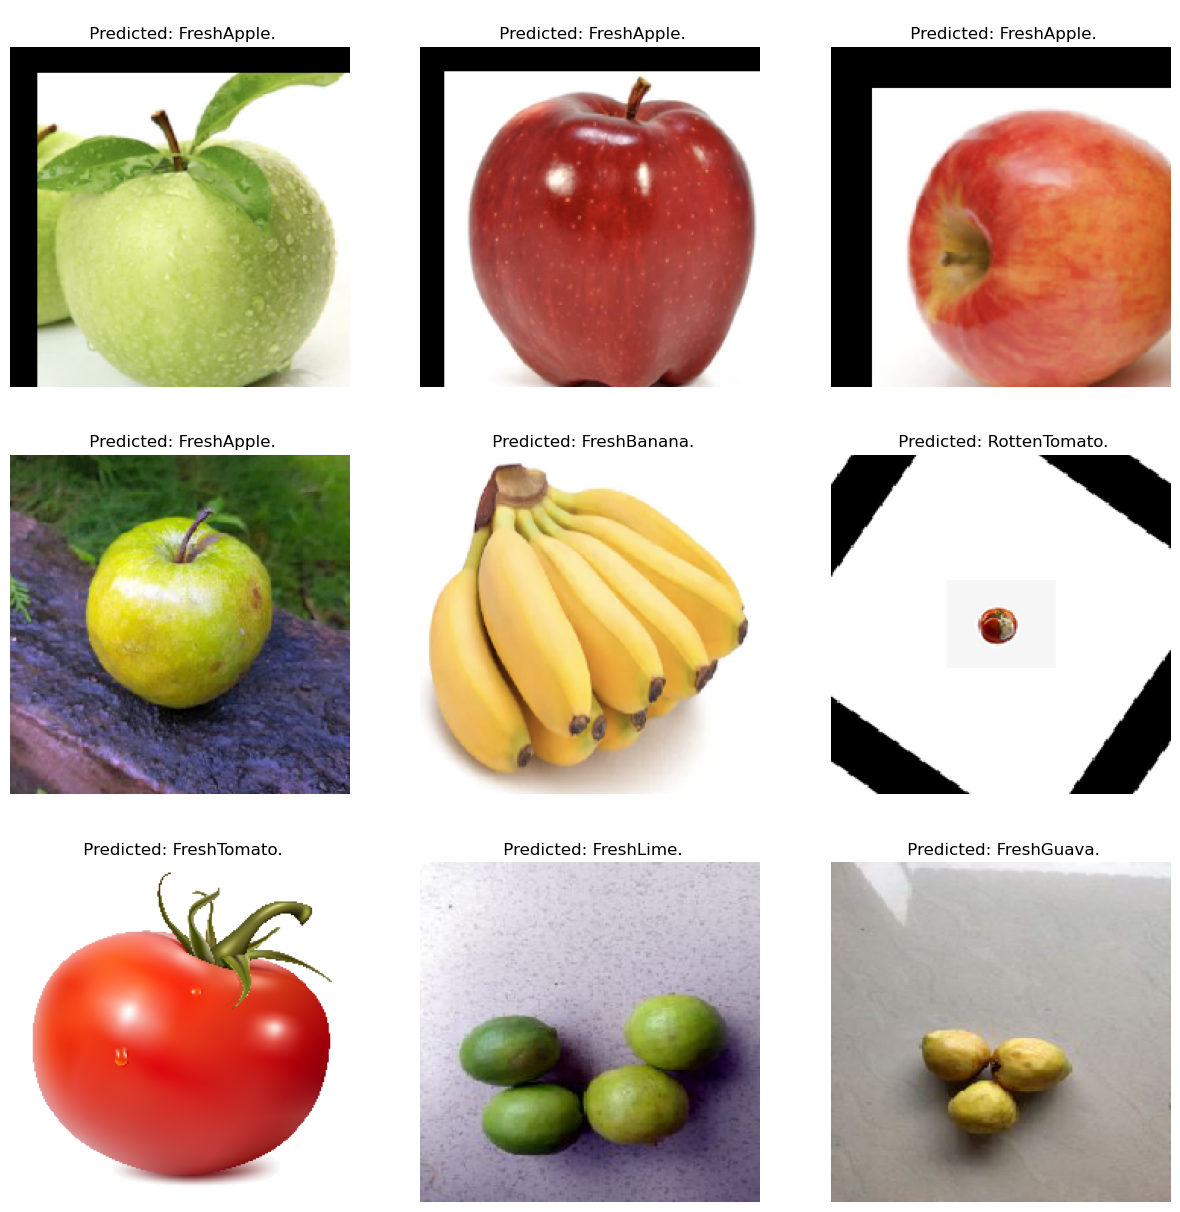

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        
        # Assuming labels[i] is already a scalar (not a NumPy array)
        #actual_class = class_names[int(labels[i][i])]  # Accessing the first element assuming labels[i] is a scalar
        
        plt.title(f"\n Predicted: {predicted_class}.")
        
        plt.axis("off")
    break  # Only iterate through one batch of images
plt.show()





In [85]:
model.save("./nice.h5")

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [88]:
class_name=list(validation_generator.class_indices.keys())
class_name

['FreshApple',
 'FreshBanana',
 'FreshBellpepper',
 'FreshCapsicum',
 'FreshCarrot',
 'FreshCucumber',
 'FreshGuava',
 'FreshLime',
 'FreshOrange',
 'FreshPotato',
 'FreshTomato',
 'RottenApple',
 'RottenBanana',
 'RottenBellpepper',
 'RottenCapsicum',
 'RottenCarrot',
 'RottenCucumber',
 'RottenGuava',
 'RottenLime',
 'RottenOrange',
 'RottenPotato',
 'RottenTomato']

In [99]:

# Register the custom function with Keras
tf.keras.utils.get_custom_objects().update({'f1_score_metric': f1_score_metric})

# Load the Keras model with custom objects
MODEL = tf.keras.models.load_model("./ff.h5", compile=False)  # Avoid compiling the model

# Compile the model with the custom metric
MODEL.compile(
    optimizer=best_optimizer_name,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy',f1_score]
)

# Converting the Keras model to the TensorFlow SavedModel format
tf.saved_model.save(MODEL, "cnn_model")

INFO:tensorflow:Assets written to: cnn_saved_model/assets


INFO:tensorflow:Assets written to: cnn_saved_model/assets
